# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [5]:
#1
"""
Your code here
"""
cut_rule = [-1,0,2,5,app_train['CNT_CHILDREN'].max()]
x=['0 children', '1 - 2 children', '3 - 5 children', 'over 5 children']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule,labels=x, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0 children         215371
1 - 2 children      87868
3 - 5 children       4230
over 5 children        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [69]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0個小孩
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0個小孩
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0個小孩
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0個小孩
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0個小孩


In [72]:
#2-1
"""
Your code here
"""
grp = ['TARGET','CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

TARGET  CNT_CHILDREN_GROUP
0       0 children            166747.010980
        1 - 2 children        174590.584401
        3 - 5 children        175053.742913
        over 5 children       139159.090909
1       0 children            160804.210548
        1 - 2 children        176115.362720
        3 - 5 children        160677.385714
        over 5 children       180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [74]:
app_train.groupby(['TARGET','CNT_CHILDREN_GROUP'])['AMT_INCOME_TOTAL'].describe()

count           mean           std      min  \
TARGET CNT_CHILDREN_GROUP                                                   
0      0 children          198762.0  166747.010980  1.061799e+05  25650.0   
       1 - 2 children       80081.0  174590.584401  1.201981e+05  26550.0   
       3 - 5 children        3810.0  175053.742913  1.128427e+05  29250.0   
       over 5 children         33.0  139159.090909  7.112483e+04  45000.0   
1      0 children           16609.0  160804.210548  8.483011e+04  25650.0   
       1 - 2 children        7787.0  176115.362720  1.327159e+06  27900.0   
       3 - 5 children         420.0  160677.385714  1.130315e+05  36000.0   
       over 5 children          9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
TARGET CNT_CHILDREN_GROUP                                             
0      0 children          112500.0  144000.0  202500.0   13500000.0  
       1 - 2 children      112500.0  157500.0  211500.0   18000090.0  
       3 - 5 children      112500.0  157500.0  202500.0    2250000.0  
       over 5 children      90000.0  112500.0  180000.0     337500.0  
1      0 children          112500.0  135000.0  202500.0    1890000.0  
       1 - 2 children      112500.0  135000.0  202500.0  117000000.0  
       3 - 5 children       96750.0  135000.0  185625.0    1350000.0  
       over 5 children     135000.0  180000.0  202500.0     315000.0

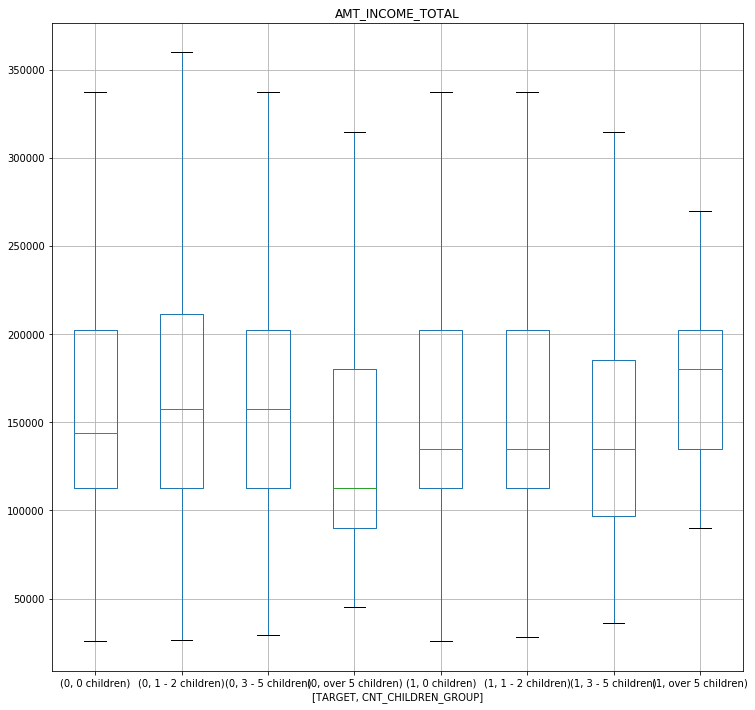

In [76]:
#2-2
"""
Your code here
"""

plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['TARGET','CNT_CHILDREN_GROUP']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [90]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-np.mean(x))/np.std(x))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491536
1,270000.0,0.972437
2,67500.0,-0.934708
3,135000.0,-0.298993
4,121500.0,-0.426136
